<a href="https://colab.research.google.com/github/Shohjahon02/first_my_git/blob/main/DL_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install fastai==2.7.12

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import torch
import fastai

In [15]:
print(torch.__version__)
print(fastai.__version__)

2.0.0+cu118
2.7.12


In [16]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

fatal: destination path 'OIDv4_ToolKit' already exists and is not an empty directory.


In [17]:
!cd OIDv4_ToolKit/ && pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
!cd OIDv4_ToolKit && python main.py -h

usage: main.py
       [-h]
       [--Dataset /path/to/OID/csv/]
       [-y]
       [--classes list of classes [list of classes ...]]
       [--type_csv 'train' or 'validation' or 'test' or 'all']
       [--sub Subset of human verified images or machine generated (h or m)]
       [--image_IsOccluded 1 or 0]
       [--image_IsTruncated 1 or 0]
       [--image_IsGroupOf 1 or 0]
       [--image_IsDepiction 1 or 0]
       [--image_IsInside 1 or 0]
       [--multiclasses 0 (default) or 1]
       [--n_threads [default 20]]
       [--noLabels]
       [--limit integer number]
       <command>
       'downloader',
       'visualizer'
       or
       'ill_downloader'.

Open Image
Dataset
Downloader

positional arguments:
  <command> 'downloader', 'visualizer' or 'ill_downloader'.
    'downloader
    ', 'visuali
    zer' or 'il
    l_downloade
    r'.

options:
  -h, --help
    show this
    help
    message and
    exit
  --Dataset /path/to/OID/csv/
    Directory
    of the OID
    dataset
    f

In [34]:
!cd OIDv4_ToolKit && python3 main.py downloader --Dataset /content --classes Fish Mammal Bird --type_csv train --limit 1000


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Fish.

Fish
    [INFO] | Downloading train images.
    [INFO] | [INFO] Found 5434 online images for train.
    [INFO] | Limiting to 1000 images.
    [INFO] | Download of 1000 images in train.
100%

In [35]:
from fastai.vision.all import*
from ipywidgets import widgets

path = Path('train')
# fls = get_image_files(path)
# failed = verify_images(path)

transports = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224)
)

dls = transports.dataloaders(path)

# dls.train.show_batch(max_n=32, nrows=4)



In [36]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [37]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.736168,0.289648,0.923333,01:01


epoch,train_loss,valid_loss,accuracy,time
0,0.379862,0.293772,0.911667,01:01
1,0.235775,0.286442,0.918333,01:01
2,0.158836,0.307656,0.925000,01:02
3,0.091759,0.285988,0.923333,01:01


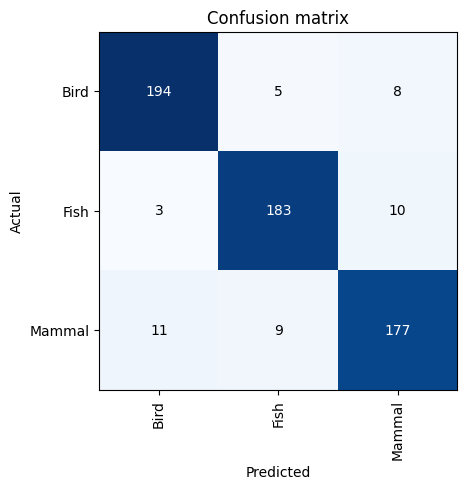

In [38]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

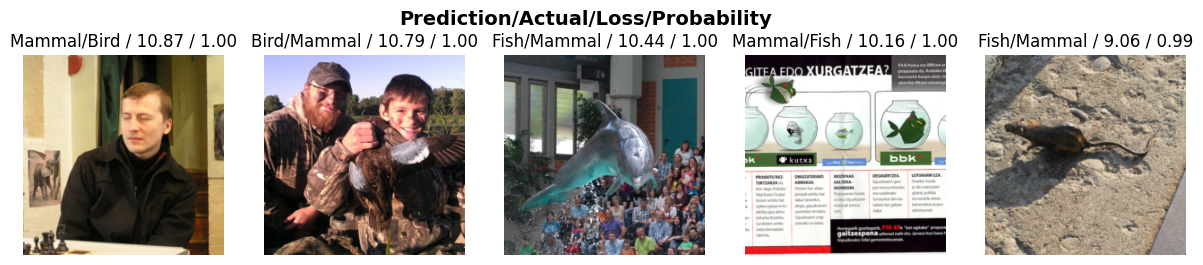

In [39]:
interp.plot_top_losses(5, nrows=1)

In [30]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Bashorat:Fish
Ehtimollik:88.9%


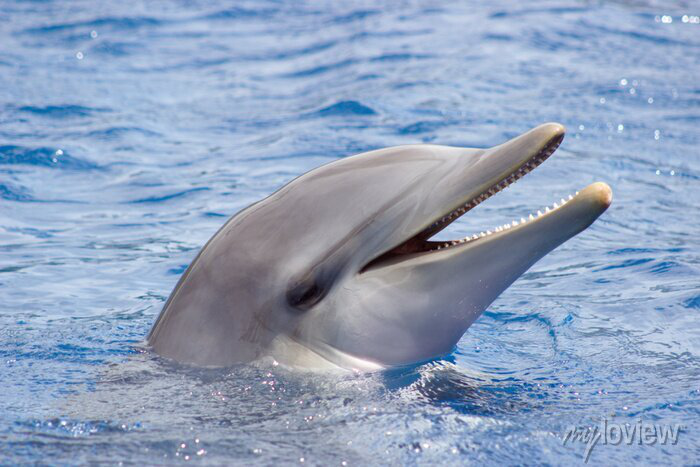

In [48]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)
print(f"Bashorat:{pred}")
print(f"Ehtimollik:{probs[pred_id]*100:.1f}%")
img

In [40]:
learn.export('animals.pkl')

In [ ]:
model = load_learner('/content/furniture_model.pkl')

In [ ]:
model.predict(img)